In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Set up the training generator
train_generator = train_datagen.flow_from_directory(
    r"D:\7th Semester\myself dataset\train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Set up the validation generator
validation_generator = train_datagen.flow_from_directory(
    r"D:\7th Semester\myself dataset\test",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Display the number of samples for each class in the training set
print("Training Set:")
for class_name, class_index in train_generator.class_indices.items():
    count = sum(train_generator.classes == class_index)
    print(f"{class_name}: {count} samples")

# Display the number of samples for each class in the validation set
print("\nValidation Set:")
for class_name, class_index in validation_generator.class_indices.items():
    count = sum(validation_generator.classes == class_index)
    print(f"{class_name}: {count} samples")

    print(f"Total samples: {len(train_generator.filenames) + len(validation_generator.filenames)}")
print(f"Training samples: {len(train_generator.filenames)}")
print(f"Validation samples: {len(validation_generator.filenames)}")


Found 15205 images belonging to 2 classes.
Found 1900 images belonging to 2 classes.
Training Set:
fresh: 8661 samples
rotten: 6544 samples

Validation Set:
fresh: 1082 samples
Total samples: 17105
rotten: 818 samples
Total samples: 17105
Training samples: 15205
Validation samples: 1900


## Model Building

In [3]:
from keras import layers, callbacks, utils, applications, optimizers
from keras.models import Sequential, Model, load_model
from keras.applications.inception_v3 import InceptionV3

# Load the pre-trained InceptionV3 model without the top layer (fully connected layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the InceptionV3 base
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2000, activation='relu'),
    layers.Dense(500, activation='relu'),
    batchnorm
    layers.Dense(100, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2000)              4098000   
                                                                 
 dense_1 (Dense)             (None, 500)               1000500   
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                        

In [4]:
# Start training model
Epochs=15
Batch_Size=32
history=model.fit(train_generator, validation_data=validation_generator, batch_size=Batch_Size, epochs=Epochs)

Epoch 1/15
476/476 [==============================] - 734s 2s/step - loss: 0.1118 - accuracy: 0.9651 - val_loss: 0.4447 - val_accuracy: 0.8658
Epoch 2/15
476/476 [==============================] - 674s 1s/step - loss: 0.0517 - accuracy: 0.9811 - val_loss: 0.3222 - val_accuracy: 0.8779
Epoch 3/15
476/476 [==============================] - 682s 1s/step - loss: 0.0472 - accuracy: 0.9832 - val_loss: 0.5183 - val_accuracy: 0.8500
Epoch 4/15
476/476 [==============================] - 721s 2s/step - loss: 0.0439 - accuracy: 0.9855 - val_loss: 0.3864 - val_accuracy: 0.8737
Epoch 5/15
476/476 [==============================] - 685s 1s/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.2762 - val_accuracy: 0.8979
Epoch 6/15
476/476 [==============================] - 559s 1s/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.1864 - val_accuracy: 0.9295
Epoch 7/15
476/476 [==============================] - 367s 771ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.1962 - val_accuracy: 0.9

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


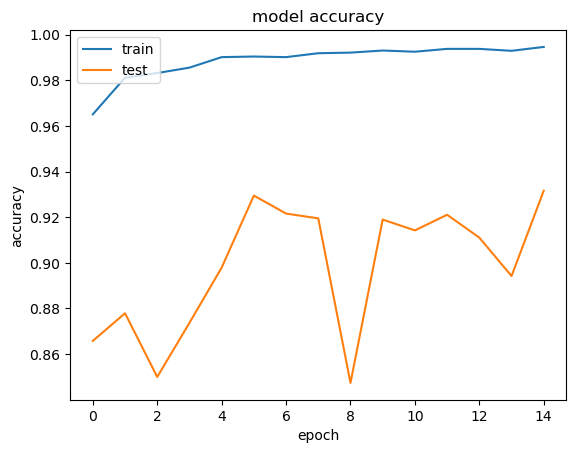

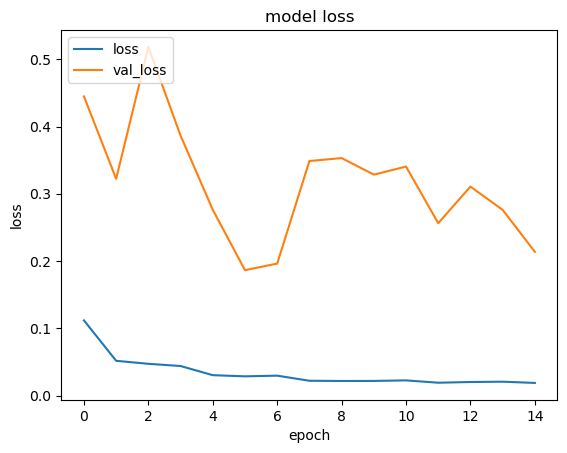

In [5]:
##### list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy'),
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()


In [6]:
model.save("dataset1.h5")

C:\Users\Haris\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
from keras.models import load_model

In [8]:
My_Model = load_model("dataset1.h5")

In [9]:
My_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2000)              4098000   
                                                                 
 dense_1 (Dense)             (None, 500)               1000500   
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                        

In [10]:
import cv2
image = cv2.imread(r"D:\7th Semester\myself dataset\train\fresh\apple_test_fresh_2.jpg")
image = cv2.resize(image, (128, 128))/255.0
model.predict(image.reshape((1, 128, 128, 3)))
VAR =model.predict(image.reshape((1, 128, 128, 3)))
np.argmax(VAR, axis=1)

1/1 [==============================] - 0s 38ms/step


array([0], dtype=int64)

In [11]:
classes = train_generator.class_indices
for class_name, class_index in classes.items():
    print(f"Class Name: {class_name}, Class Index: {class_index}")
print(classes)

Class Name: fresh, Class Index: 0
Class Name: rotten, Class Index: 1
{'fresh': 0, 'rotten': 1}


In [12]:
classes = train_generator.class_indices
reversed_dict = {value: key for key, value in classes.items()}

In [14]:
reversed_dict[0],reversed_dict[1]

('fresh', 'rotten')